In [52]:
import pandas as pd
from google.colab import files

#upload the file
uploaded = files.upload()

#load the dataset
file_name = "Dataset Clean (1).xlsx"
df = pd.read_excel(file_name)

#display the first few rows
df.head()

Saving Dataset Clean (1).xlsx to Dataset Clean (1) (2).xlsx


,Number,Biomass,TP,TemP,Time (min),PS,BET,PV,C,H,N,O,Qm (mg/g)
0,1.0,Waste sludge (paper),Citalopram,315,150.0,9.82,3.43,0.02,30.84,2.14,0.43,20.32,4.4
1,NaN,Waste sludge (paper),Citalopram,600,10.0,1.37,94.39,0.06,30.69,0.96,0.32,20.41,3.8
2,NaN,Waste sludge (paper),Citalopram,800,10.0,1.37,120.86,0.08,28.81,0.47,0.33,19.29,8.5
3,NaN,Waste sludge (Biological),Citalopram,800,150.0,1.41,209.12,0.13,27.05,0.82,0.33,9.73,19.6
4,NaN,Waste sludge (Biological),Citalopram,800,10.0,3.69,10.82,0.02,35.35,0.72,2.47,2.01,4.3


In [60]:
# check for missing data
missing_data = df.isnull().sum()

# display columns with missing data
missing_data[missing_data > 0]

,0
Biomass,1


In [54]:
# dropping rows with missing data
df_cleaned = df.dropna()

In [55]:
# impute missing data with the mean
df['PS'].fillna(df['PS'].mean(), inplace=True)
df['PV'].fillna(df['PV'].mean(), inplace=True)
df['H'].fillna(df['H'].mean(), inplace=True)
df['O'].fillna(df['O'].mean(), inplace=True)
df['C'].fillna(df['C'].mean(), inplace=True)
df['Number'].fillna(df['Number'].mean(), inplace=True)

In [57]:
# print the dataset's columns
print(df.columns)

# check the data types to identify numeric columns
df.dtypes

Index(['Number', 'Biomass', 'TP', 'TemP', 'Time (min)', 'PS', 'BET', 'PV', 'C',
       'H', 'N', 'O', 'Qm (mg/g)'],
      dtype='object')


,0
Number,float64
Biomass,object
TP,object
TemP,int64
Time (min),float64
PS,float64
BET,float64
PV,float64
C,float64
H,float64


In [64]:
# column conversion
df['N'] = df['N'].str.replace(',','.').astype(float)

# impute N
df['N'].fillna(df['N'].mean(), inplace=True)



AttributeError: Can only use .str accessor with string values!

In [59]:
df.N

,N
0,3.26
1,3.26
2,3.26
3,3.26
4,3.26
...,...
81,3.26
82,3.26
83,3.26
84,3.26


In [61]:
# remove the first column
df = df.iloc[:, 1:]

# display first few rows
df.head()

,Biomass,TP,TemP,Time (min),PS,BET,PV,C,H,N,O,Qm (mg/g)
0,Waste sludge (paper),Citalopram,315,150.0,9.82,3.43,0.02,30.84,2.14,3.26,20.32,4.4
1,Waste sludge (paper),Citalopram,600,10.0,1.37,94.39,0.06,30.69,0.96,3.26,20.41,3.8
2,Waste sludge (paper),Citalopram,800,10.0,1.37,120.86,0.08,28.81,0.47,3.26,19.29,8.5
3,Waste sludge (Biological),Citalopram,800,150.0,1.41,209.12,0.13,27.05,0.82,3.26,9.73,19.6
4,Waste sludge (Biological),Citalopram,800,10.0,3.69,10.82,0.02,35.35,0.72,3.26,2.01,4.3


In [66]:
# print the dataset's column
print(df.columns)

# check the data types to identify numeric columns
df.dtypes

Index(['Biomass', 'TP', 'TemP', 'Time (min)', 'PS', 'BET', 'PV', 'C', 'H', 'N',
       'O', 'Qm (mg/g)'],
      dtype='object')


,0
Biomass,object
TP,object
TemP,int64
Time (min),float64
PS,float64
BET,float64
PV,float64
C,float64
H,float64
N,float64


In [67]:
# identify categorical columns
cat_columns = df.select_dtypes(include=['object']).columns

# display categorical columns
cat_columns

Index(['Biomass', 'TP'], dtype='object')

In [65]:
# convert Qm
df['Qm (mg/g)'] = df['Qm (mg/g)'].astype(float)

In [68]:
# one-hot encoding to categorical variables
df_encoded = pd.get_dummies(df, columns = cat_columns, drop_first=True)

# display
df_encoded.head()

,TemP,Time (min),PS,BET,PV,C,H,N,O,Qm (mg/g),...,TP_Norfloxacin,TP_Oxytetracycline,TP_Oxytetracycline,TP_Salicylic acid,TP_Sulfadiazine,TP_Sulfamethoxazole,TP_Tetracycline,TP_Triclosan,TP_ibuprofen,TP_sulfamethazine
0,315,150.0,9.82,3.43,0.02,30.84,2.14,3.26,20.32,4.4,...,False,False,False,False,False,False,False,False,False,False
1,600,10.0,1.37,94.39,0.06,30.69,0.96,3.26,20.41,3.8,...,False,False,False,False,False,False,False,False,False,False
2,800,10.0,1.37,120.86,0.08,28.81,0.47,3.26,19.29,8.5,...,False,False,False,False,False,False,False,False,False,False
3,800,150.0,1.41,209.12,0.13,27.05,0.82,3.26,9.73,19.6,...,False,False,False,False,False,False,False,False,False,False
4,800,10.0,3.69,10.82,0.02,35.35,0.72,3.26,2.01,4.3,...,False,False,False,False,False,False,False,False,False,False


In [69]:
# assume 'target_column' is the name of your target variable
x = df_encoded.drop('Qm (mg/g)', axis =1)
y = df_encoded['Qm (mg/g)']

x.head(), y.head()

(   TemP  Time (min)    PS     BET    PV      C     H     N      O  \
 0   315       150.0  9.82    3.43  0.02  30.84  2.14  3.26  20.32   
 1   600        10.0  1.37   94.39  0.06  30.69  0.96  3.26  20.41   
 2   800        10.0  1.37  120.86  0.08  28.81  0.47  3.26  19.29   
 3   800       150.0  1.41  209.12  0.13  27.05  0.82  3.26   9.73   
 4   800        10.0  3.69   10.82  0.02  35.35  0.72  3.26   2.01   
 
    Biomass_Alfalfa  ...  TP_Norfloxacin  TP_Oxytetracycline  \
 0            False  ...           False               False   
 1            False  ...           False               False   
 2            False  ...           False               False   
 3            False  ...           False               False   
 4            False  ...           False               False   
 
    TP_Oxytetracycline   TP_Salicylic acid  TP_Sulfadiazine  \
 0                False              False            False   
 1                False              False            False   
 2 

In [70]:
# display summary stats
summary_stat = df.describe()
print(summary_stat)

             TemP  Time (min)          PS          BET         PV          C  \
count   86.000000   86.000000   86.000000    86.000000  86.000000  86.000000   
mean   566.453488  151.347287   13.908847   191.444442   0.152331  57.293855   
std    170.921148  126.607738   38.729014   298.769825   0.179817  20.035848   
min    300.000000    0.100000    1.320000     0.479000   0.001000   9.460000   
25%    450.000000   60.000000    2.910000     7.100000   0.020000  42.192500   
50%    500.000000  120.000000    4.440000    59.090000   0.100000  58.660000   
75%    700.000000  150.000000    9.865000   295.500000   0.223750  73.732500   
max    950.000000  480.000000  213.290000  1838.860000   1.030000  89.570000   

               H             N          O   Qm (mg/g)  
count  86.000000  8.600000e+01  86.000000   86.000000  
mean    1.927890  3.260000e+00  16.469048   39.077536  
std     1.609467  1.786775e-15  10.828736   55.088497  
min     0.000000  3.260000e+00   0.670000    0.221900  

In [71]:
encoded_col = [col for col in df_encoded.columns if col not in df.columns]

print("One-hot encoded columns:")
print(encoded_col)

One-hot encoded columns:
['Biomass_Alfalfa', 'Biomass_Biosolids from muncipal waste', 'Biomass_Burcucumber plants', 'Biomass_Califlower Roots ', 'Biomass_Cassava waste', 'Biomass_Chinese herbal medicine residues (Plant)', 'Biomass_Coffee Grounds', 'Biomass_Corn stalk', 'Biomass_Corn straw', 'Biomass_Cow Manure', 'Biomass_Eucalyptus sawdust ', 'Biomass_Eucalypus ', 'Biomass_Fallen leaves ', 'Biomass_Hollow Tree', 'Biomass_Maize straw ', 'Biomass_Parthenium hysterophorus', 'Biomass_Pinewood', 'Biomass_Potato plant stem clay', 'Biomass_Processing waste', 'Biomass_Quince', 'Biomass_Rice Straw', 'Biomass_River sediment', 'Biomass_Sludge (pharmaceutical)', 'Biomass_Spirulina sp. (microalgae)', 'Biomass_Straw biochar', 'Biomass_Swine manure', 'Biomass_Tea leaves', 'Biomass_Thalia dealbata', 'Biomass_Vine', 'Biomass_Walnut tree', 'Biomass_Waste sludge (Biological)', 'Biomass_Waste sludge (paper)', 'Biomass_Wood chip biochar', 'Biomass_bagasse (100 mM FeCl3)', 'Biomass_bagasse (200 mM FeCl3)', 

In [72]:
df_no_encoding = df_encoded.drop(columns=encoded_col)

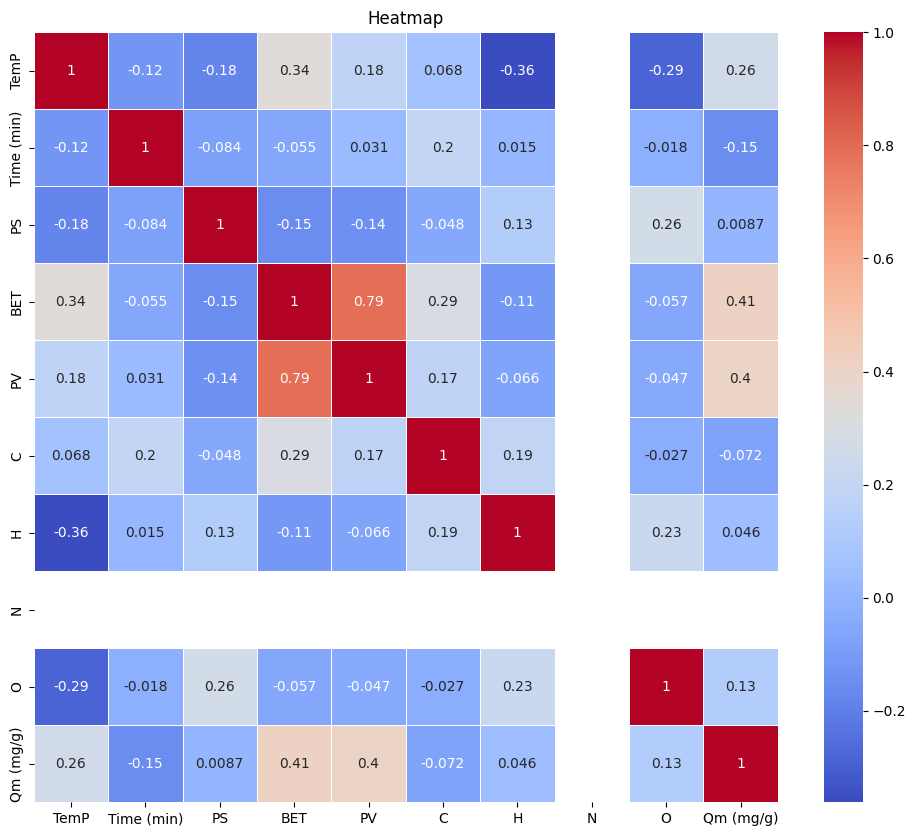

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df_no_encoding.corr(), annot = True, cmap = 'coolwarm', linewidths=0.5)
plt.title('Heatmap')
plt.show()

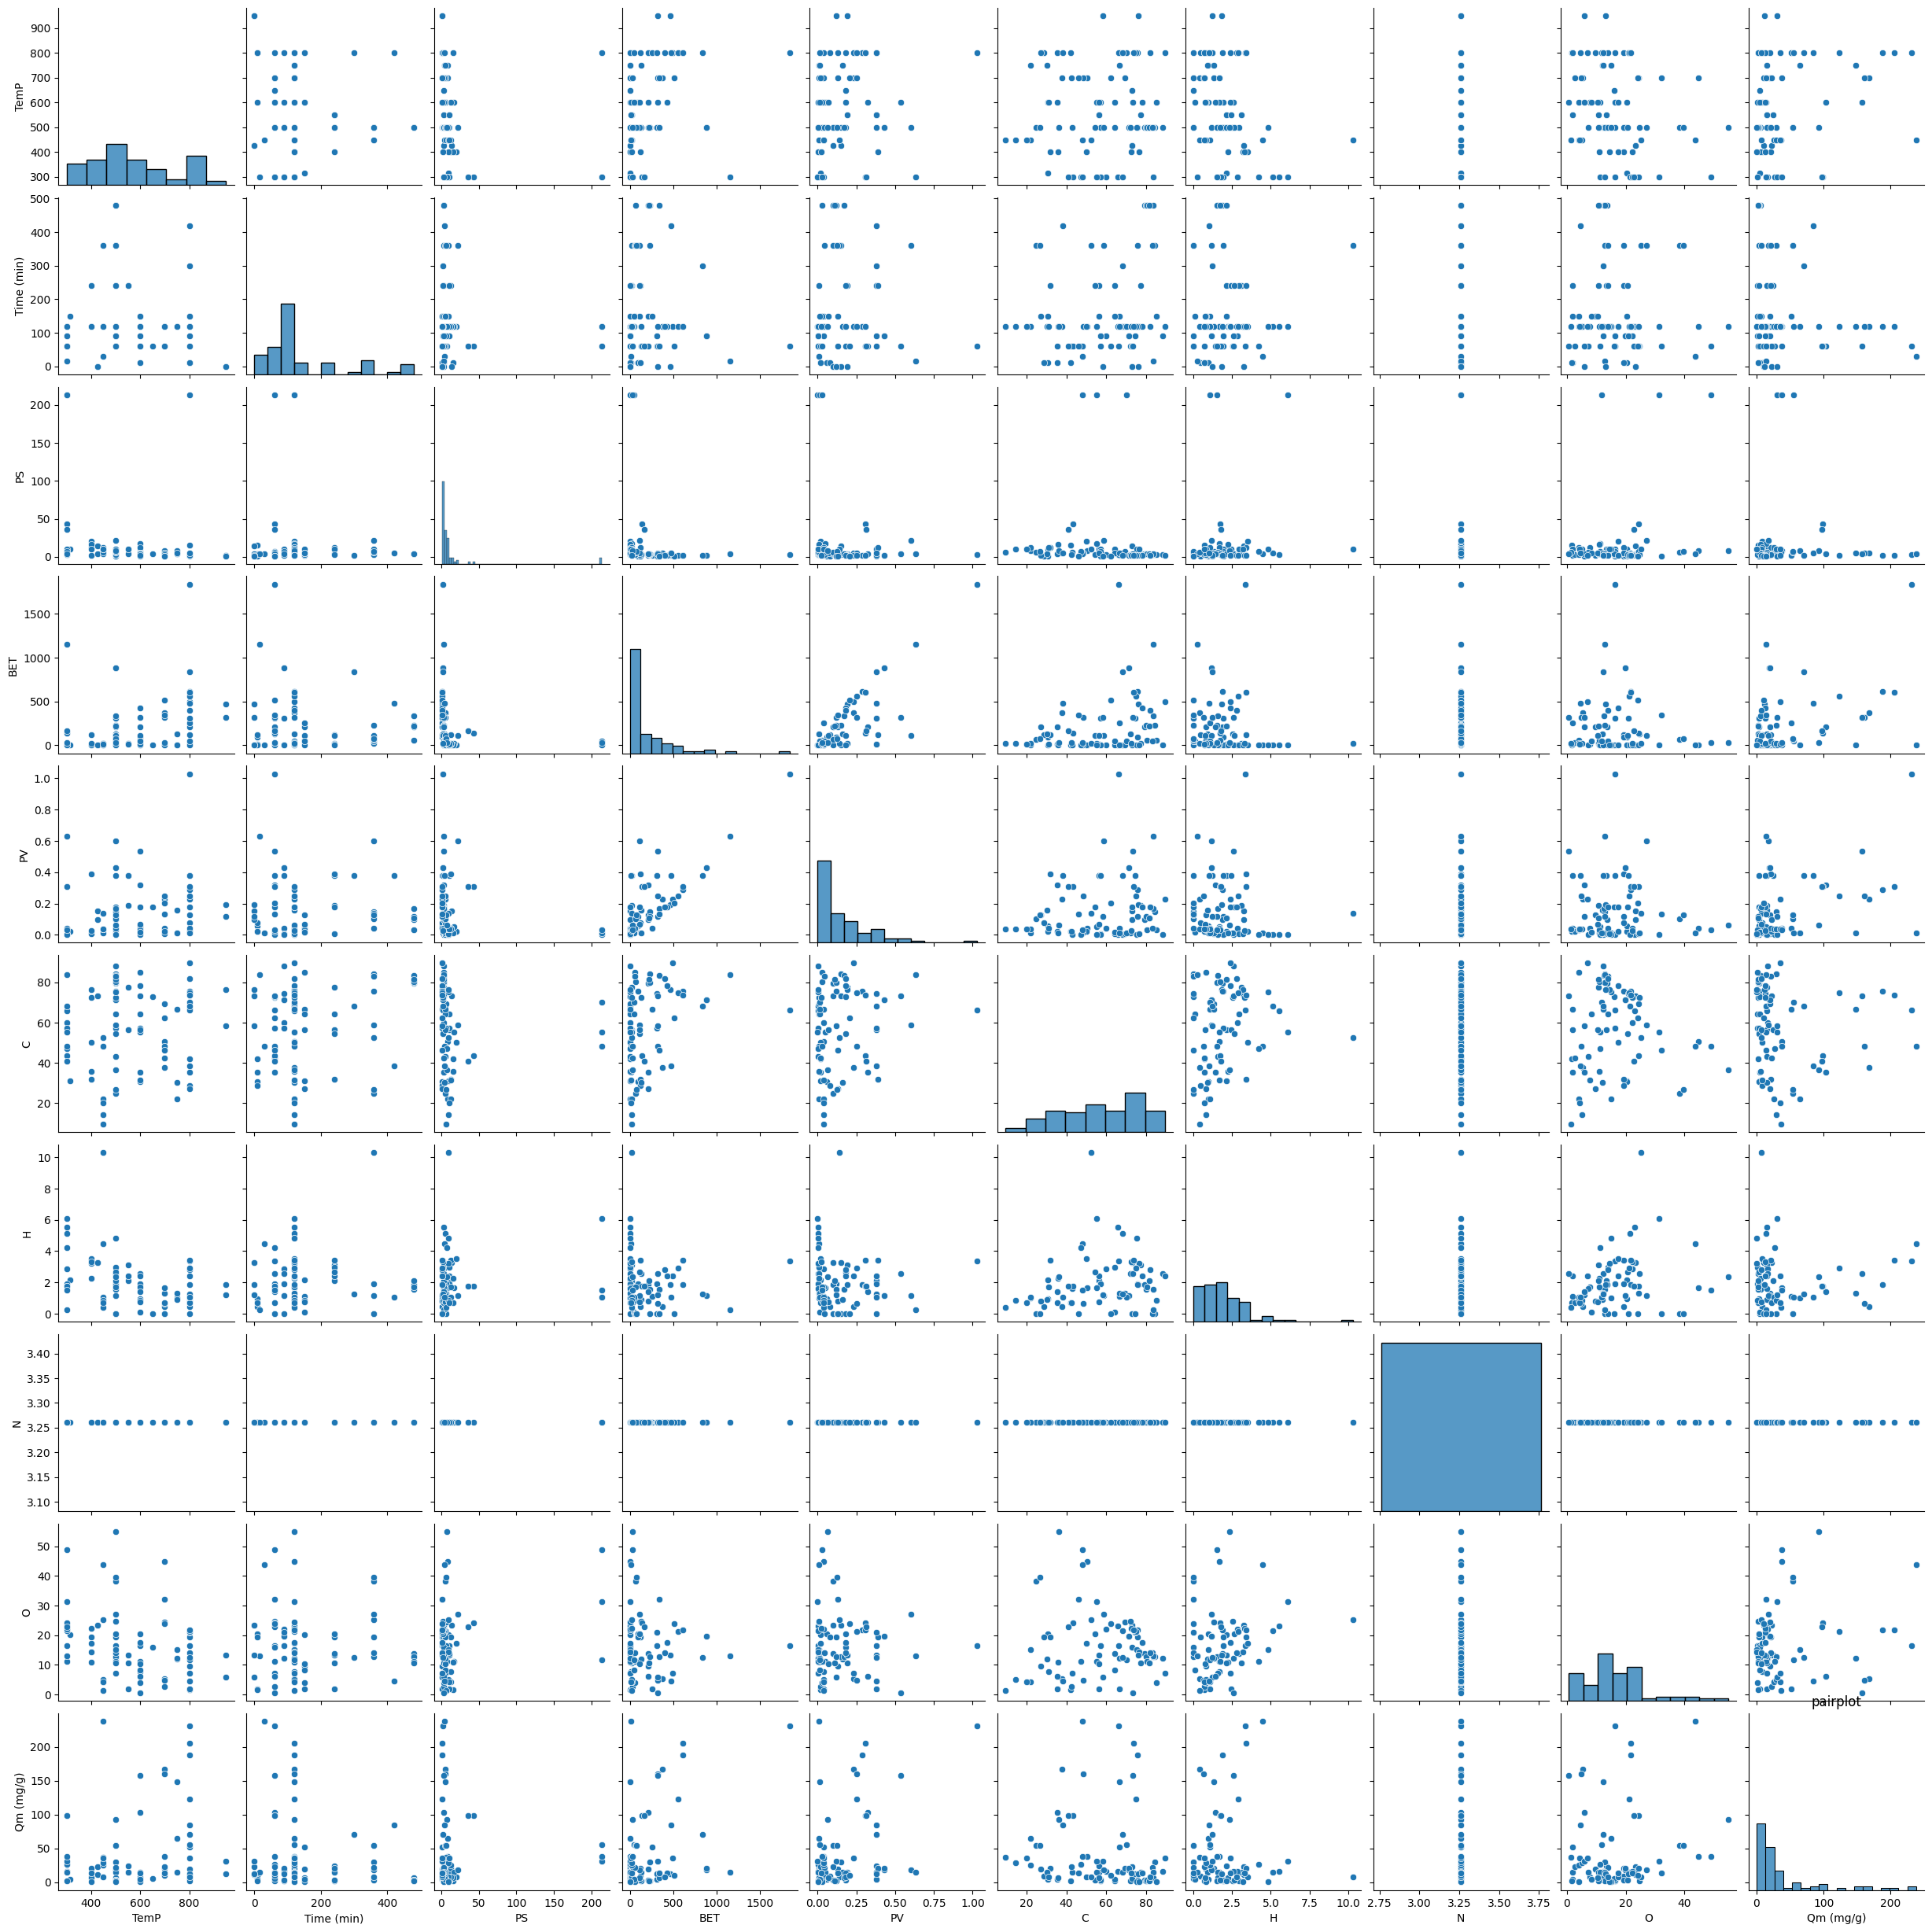

In [75]:
sns.pairplot(df)
plt.title('pairplot')
plt.show()

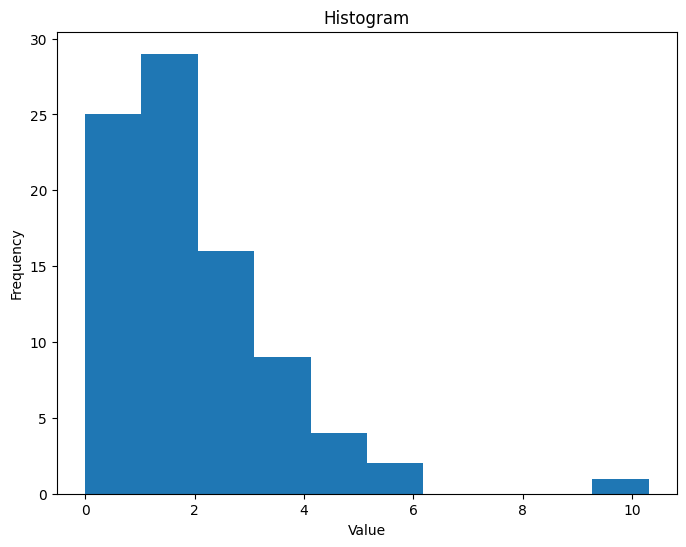

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['H'])
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

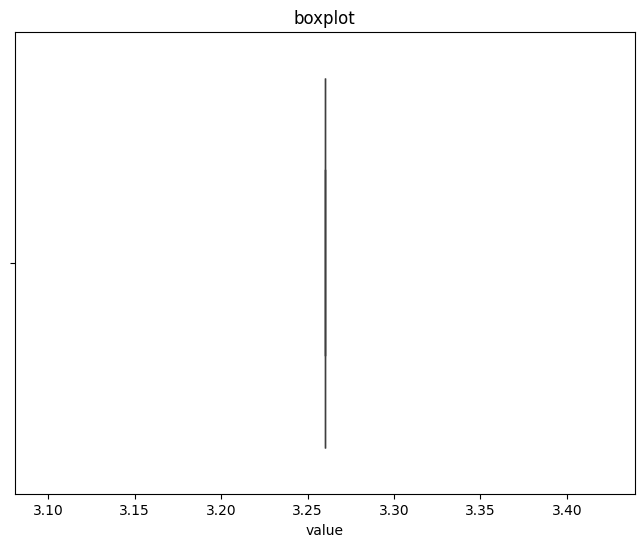

In [78]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['N'])
plt.title('boxplot')
plt.xlabel('value')
plt.show()

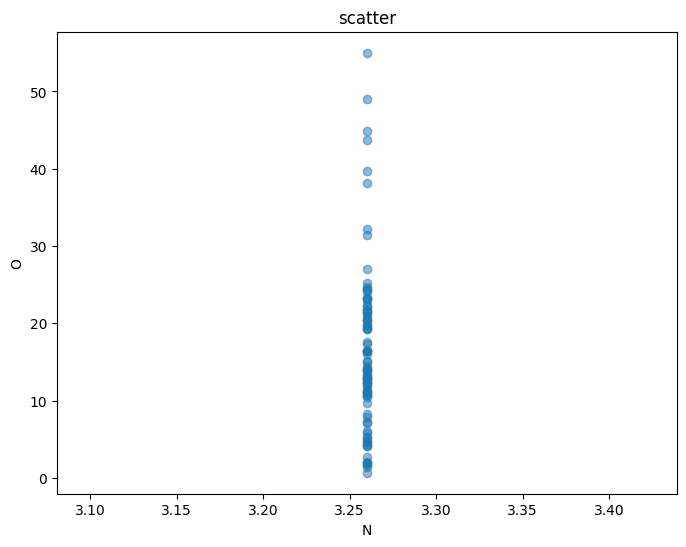

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(df['N'], df['O'], alpha = 0.5)
plt.title('scatter')
plt.xlabel('N')
plt.ylabel('O')
plt.show()

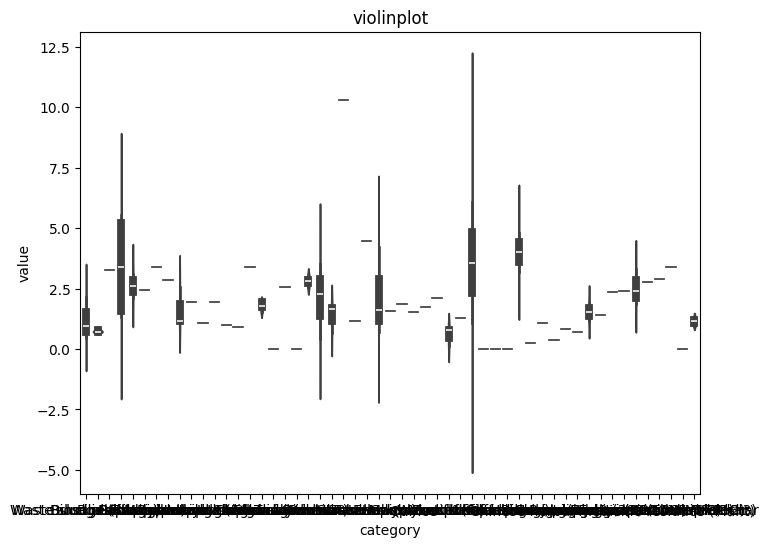

In [80]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Biomass', y='H', data = df)
plt.title('violinplot')
plt.xlabel('category')
plt.ylabel('value')
plt.show()